![](../src/image/meli3.JPG)

# Entrenamiento, y Modelado y Validacion del Classifier

#### Ya teniendo en nuestro embedding de la data fuente, realizaremos el entrenamiento de 3 modelos de Clasificacion, RandomForest, SVMClassifier y el XGBOOST. para ver cual de ellos nos clasifica mejor.


### Pasos
1. [Preparacion de la data.](#1)
1. [Modelado y entrenamiento](#2)
1. [Validacion](#3)

<a id="1"></a> <br>
# 1. Preparacion de la Data

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report
from ast import literal_eval


In [11]:
#Leo los datos ya procesados con los embeddings de 3-small
df_270 = pd.read_csv("./data/data_embedding_numeric_wo_rp.csv")


In [12]:
df_270["embedding"] = df_270.embedding.apply(literal_eval).apply(np.array)
print(df_270.shape)
df_270.head(2)

(1000, 11)


,Unnamed: 0,seller_nickname,stock,price,Products,total_amount,Kmeans,AgC,mix,tokens,embedding
0,0,d2907af75d,42017,585.00,2,24579945.00,2,0,Stock: 42017; Price: 585.0; Products: 2; tota...,28,"[0.014666757546365261, -0.05899205431342125, 0..."
1,1,8a1b7be2c0,875,11910.47,22,10421661.25,4,1,Stock: 875; Price: 11910.47; Products: 22; to...,28,"[0.0177466943860054, -0.04711324721574783, 0.0..."


In [13]:
# Separo la data de validacion de la train y test,
df_val=df_270[df_270['Kmeans'].isnull()]
print(df_val.shape)
df_270=df_270[df_270['Kmeans'].isnull()==False]
df_270[df_270['Kmeans'].isnull()] # Valido que ninguno no tengan datos con valores en la etiqueta
df270 = df_270.iloc[np.random.permutation(len(df_270))].reset_index(drop=True)
df_270.head(2)

(0, 11)


,Unnamed: 0,seller_nickname,stock,price,Products,total_amount,Kmeans,AgC,mix,tokens,embedding
0,0,d2907af75d,42017,585.00,2,24579945.00,2,0,Stock: 42017; Price: 585.0; Products: 2; tota...,28,"[0.014666757546365261, -0.05899205431342125, 0..."
1,1,8a1b7be2c0,875,11910.47,22,10421661.25,4,1,Stock: 875; Price: 11910.47; Products: 22; to...,28,"[0.0177466943860054, -0.04711324721574783, 0.0..."


In [14]:
# Obtenemos los datos de entrenamiento y de test

x_train,x_test,y_train,y_test = train_test_split(
    list(df_270.embedding.values),df_270.Kmeans,test_size=20,random_state=13
)

df_270['Kmeans'].value_counts()

Kmeans
2    200
4    200
3    200
1    200
0    200
Name: count, dtype: int64

<a id="2"></a> <br>
# 2. Modelado y entrenamiento.

# RANDOM-FOREST - CLASSIFIER

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.67      0.67      0.67         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       0.71      1.00      0.83         5

    accuracy                           0.85        20
   macro avg       0.88      0.88      0.87        20
weighted avg       0.88      0.85      0.85        20



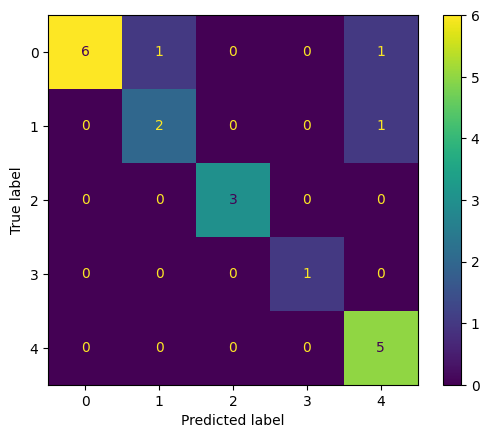

In [15]:
# Modelado, Entrenamiento, Evaluacion
clf = RandomForestClassifier(n_estimators=100) #iniciamos el modelo
clf.fit(x_train, y_train) #entrenamos el modelo
predicts = clf.predict(x_test) #realizamos las predicciones
probas = clf.predict_proba(x_test) #realizamos las probabilidades

report = classification_report(y_test, predicts)
print(report)
matrix = confusion_matrix(y_pred= predicts ,y_true= y_test)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()

## SUPPORT VECTOR MACHINE - CLASSIFIER

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.60      1.00      0.75         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       0.75      0.60      0.67         5

    accuracy                           0.85        20
   macro avg       0.87      0.89      0.87        20
weighted avg       0.88      0.85      0.85        20



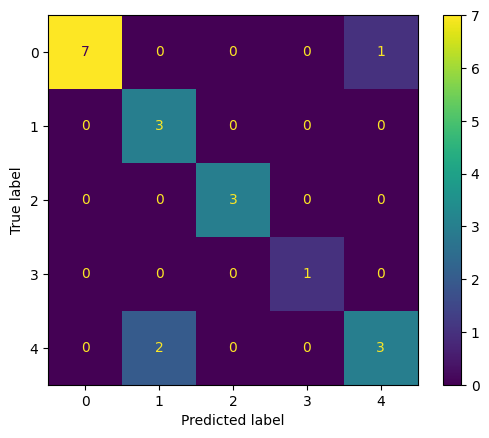

In [17]:
# Modelado, Entrenamiento, Evaluacion
clf = SVC() #iniciamos el modelo
clf.fit(x_train, y_train) #entrenamos el modelo
predicts = clf.predict(x_test) #realizamos las predicciones


report = classification_report(y_test, predicts)
print(report)
matrix = confusion_matrix(y_pred= predicts ,y_true= y_test)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()

# XGBOOST - CLASSIFIER

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.60      1.00      0.75         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      0.80      0.89         5

    accuracy                           0.90        20
   macro avg       0.92      0.93      0.91        20
weighted avg       0.94      0.90      0.91        20



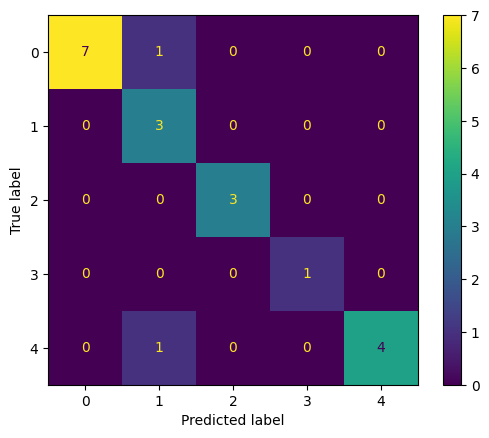

In [18]:
# Modelado, Entrenamiento, Evaluacion
clf = XGBClassifier() #iniciamos el modelo
clf.fit(x_train, y_train) #entrenamos el modelo
predicts = clf.predict(x_test) #realizamos las predicciones


report = classification_report(y_test, predicts)
print(report)
matrix = confusion_matrix(y_pred= predicts ,y_true= y_test)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()

<a id="3"></a> <br>
# 3. Validacion